## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Answer: Does an association exist between handedness and hating shopping? Handedness and age? Handedness and education?

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score, precision_score, accuracy_score

In [2]:
df = pd.read_csv('data.csv', sep="\t")

In [3]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer: I think some of this data should not be collected especially the personal information about the persons identity. If I had to collect the data I would make sure all the respondents knew that putting do not with to answer was an option. Before I collected this data I would try to make sure that it was only going to be used for this study. Overall though I definetly think some of the questions should never have been part of the survey.

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           4184 non-null   int64 
 1   Q2           4184 non-null   int64 
 2   Q3           4184 non-null   int64 
 3   Q4           4184 non-null   int64 
 4   Q5           4184 non-null   int64 
 5   Q6           4184 non-null   int64 
 6   Q7           4184 non-null   int64 
 7   Q8           4184 non-null   int64 
 8   Q9           4184 non-null   int64 
 9   Q10          4184 non-null   int64 
 10  Q11          4184 non-null   int64 
 11  Q12          4184 non-null   int64 
 12  Q13          4184 non-null   int64 
 13  Q14          4184 non-null   int64 
 14  Q15          4184 non-null   int64 
 15  Q16          4184 non-null   int64 
 16  Q17          4184 non-null   int64 
 17  Q18          4184 non-null   int64 
 18  Q19          4184 non-null   int64 
 19  Q20          4184 non-null 

All variables are ints except for country. This means there are not many dummy variables to create.

In [5]:
df['hand'].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

We have an unbalanced classes which is going to be a problem.

In [6]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,479.994503,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,3142.178542,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,186.000000,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,242.000000,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,324.250000,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,119834.000000,2.000000,2.000000,23763.000000,4.000000,3.000000,5.000000,7.000000,7.000000,3.000000


In [7]:
df =df.drop(columns =['country'])

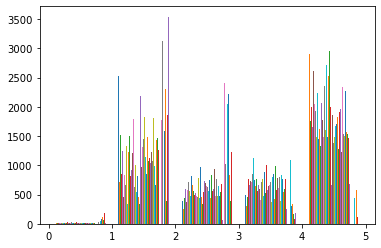

In [8]:
plt.hist(df,range=[0,5],bins =5);

All values between 1 and 5. This many histograms all on top of each other is not very readable.

In [9]:
corr = df.corr()[['hand']].sort_values('hand' ,ascending =False)

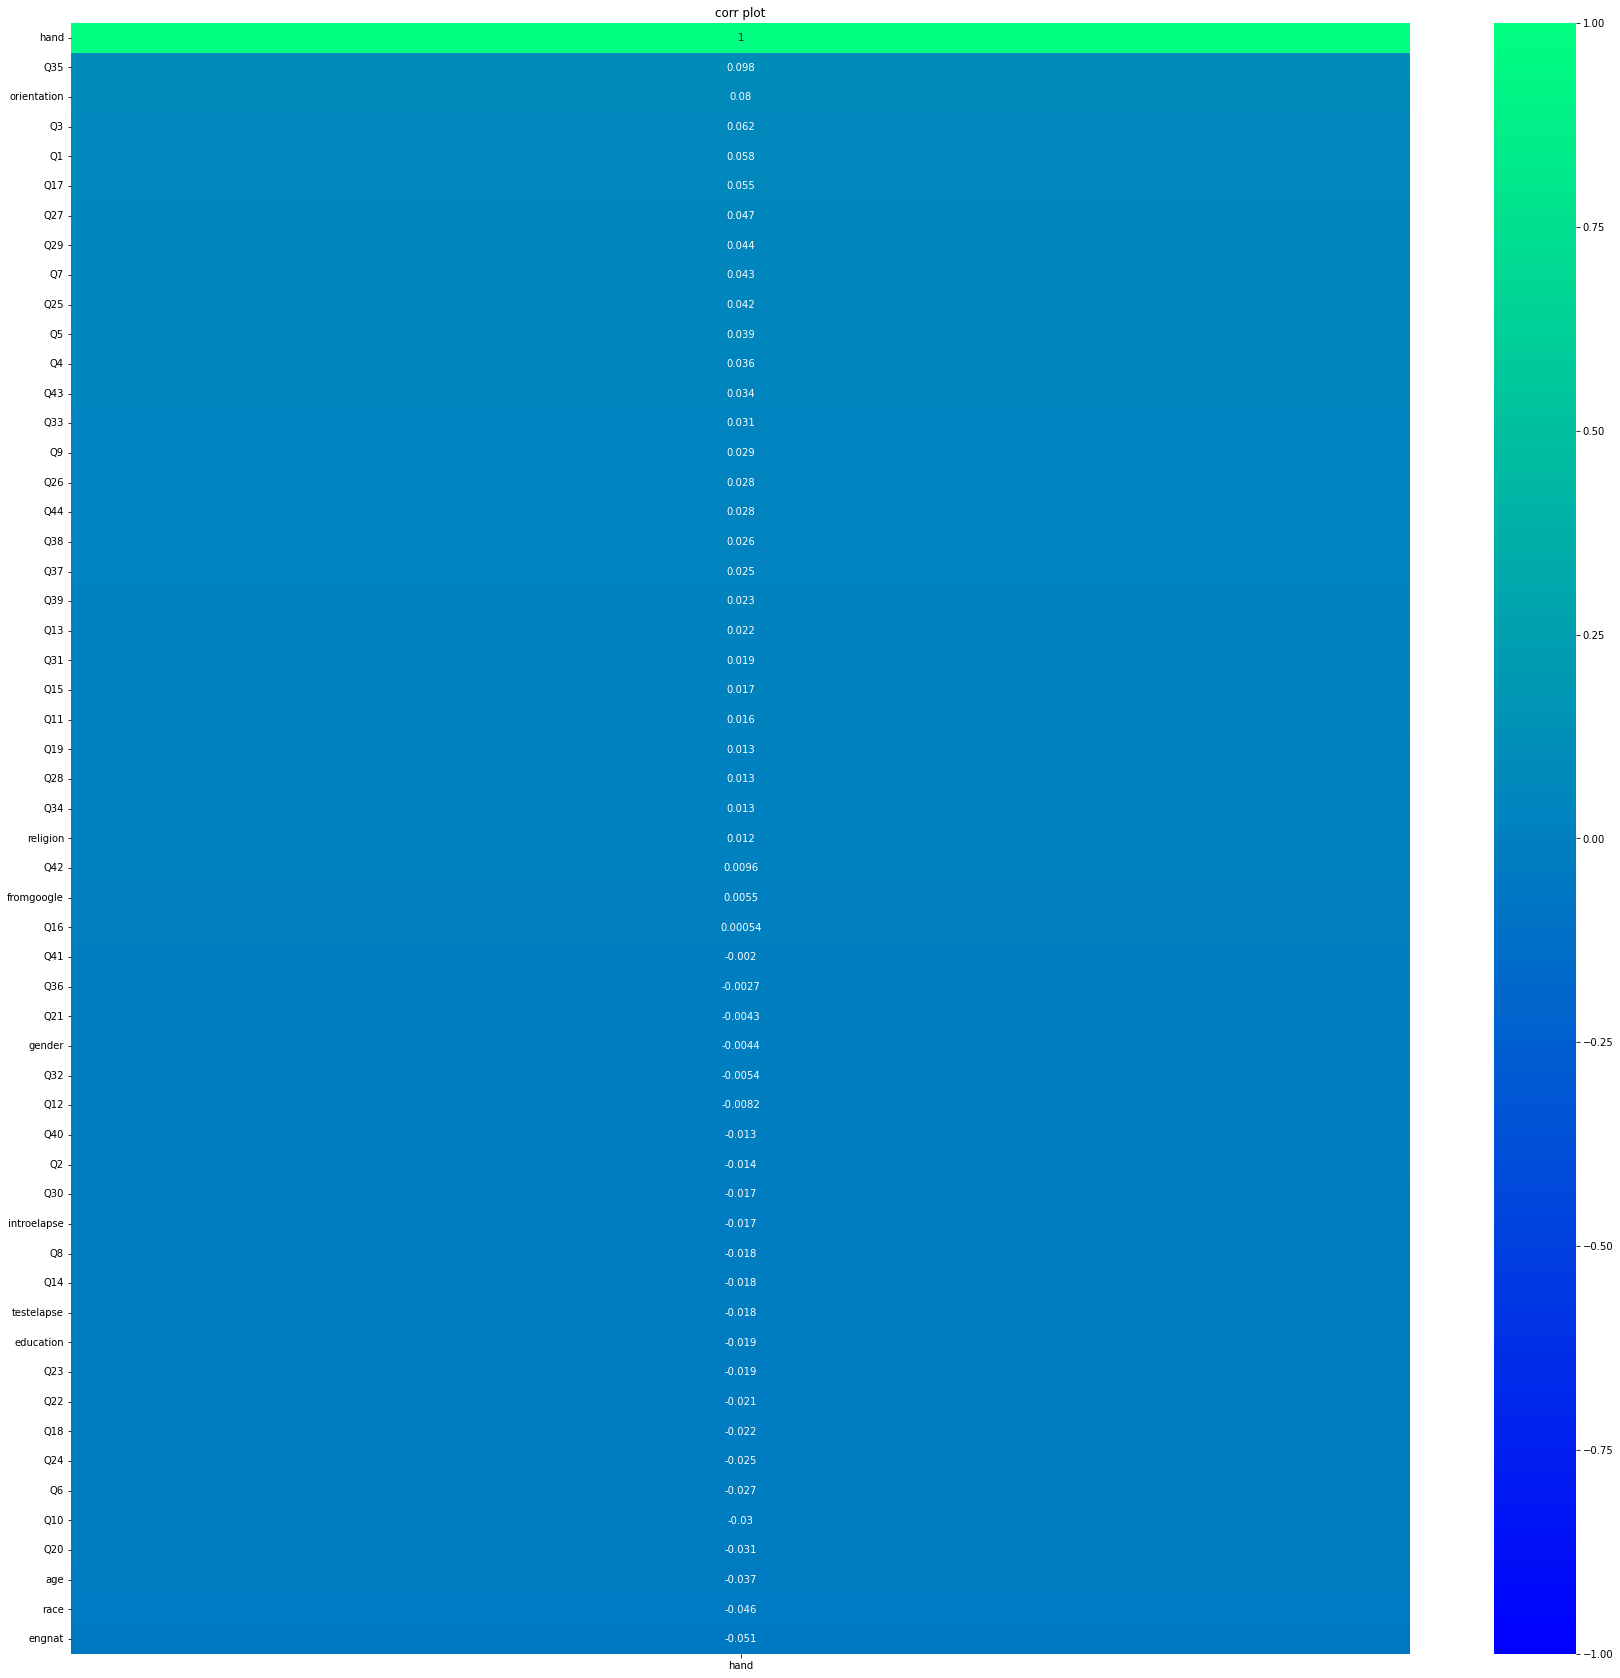

In [10]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr, annot =True, cmap = 'winter', vmin=-1, vmax =1);
plt.title('corr plot'); #heatmap

None of the variables have a high correlation with hand.

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer: This is going to be a classification problem because our target variable is binary.

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: In general we standardize variables to make sure they are of similar magnititutes. For instance if we were predicting college admittance we would want to scale our variables because gpa and sat score are on very different scales.

### 7. Give an example of when we might not standardize our variables.

Answer: Only if our variables were all on the same scale.

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

Answer: We do not need to scale here because Q1 to Q44 are all on the 1 to 5 scale. If we decide to include more variables like age then we would scale the features. 

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: 

We need to change the y variable to be binary where the person is either lefthanded or not.

In [11]:
hand = pd.get_dummies(df['hand'])

In [12]:
df = df.join(hand)

In [13]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,education,gender,orientation,race,religion,hand,0,1,2,3
0,4,1,5,1,5,1,5,1,4,1,...,3,1,1,3,2,3,0,0,0,1
1,1,5,1,4,2,5,5,4,1,5,...,1,2,2,6,1,1,0,1,0,0
2,1,2,1,1,5,4,3,2,1,4,...,4,1,1,1,1,2,0,0,1,0
3,1,4,1,5,1,4,5,4,3,5,...,2,2,5,3,2,2,0,0,1,0
4,5,1,5,1,5,1,5,1,3,1,...,3,1,1,3,2,3,0,0,0,1


### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

Answer: In general we pick an odd number so that there are no ties between the neighbors.

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [14]:
features =['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28','Q29','Q30','Q31','Q32','Q33','Q34','Q35','Q36','Q37','Q38','Q39','Q40','Q41','Q42','Q43','Q44']
X = df[features]
y = df[2]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [16]:
knn = KNeighborsClassifier(n_neighbors =3)

In [17]:
knn2 = KNeighborsClassifier()

In [18]:
knn3 = KNeighborsClassifier(n_neighbors =15)

In [19]:
knn4 = KNeighborsClassifier(n_neighbors =25)

In [20]:
knn.fit(X_train, y_train)
knn2.fit(X_train, y_train)
knn3.fit(X_train, y_train)
knn4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 12. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer: There is default regularization. Ridge regularization is the default.

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

Answer: Usually standarization is important. However because all the variables are the same scale we actually do not have to.

### 14. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

In [21]:
logreg1 = LogisticRegression(C=1,penalty="l1", solver="liblinear")
logreg1.fit(X_train, y_train)
logreg2 = LogisticRegression(C=0.1,penalty="l1", solver="liblinear")
logreg2.fit(X_train, y_train)
logreg3 = LogisticRegression(C=1,penalty="l2", solver="liblinear")
logreg3.fit(X_train, y_train)
logreg4 = LogisticRegression(C=0.1,penalty="l2", solver="liblinear")
logreg4.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

---
## Step 5: Evaluate the model(s).

### 15. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

Answer: In my opinion people's personality will not have much of an impact on their handedness. Handedness seems like a genetic trait not something personality driven. I think the scores will be low. However due to imbalanced classes the scores might be fine since the model might predict everone is righthanded.

### 16. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)
- Note: Your answers here might look a little weird. You didn't do anything wrong; that's to be expected!

In [22]:
preda = logreg1.predict(X_train)
predb = logreg2.predict(X_train)
predc = logreg3.predict(X_train)
predd = logreg4.predict(X_train)

In [23]:
pred1 = logreg1.predict(X_test)
pred2 = logreg2.predict(X_test)
pred3 = logreg3.predict(X_test)
pred4 = logreg4.predict(X_test)

In [24]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.9069471000637349, 0.8499043977055449)

In [25]:
knn2.score(X_train, y_train), knn2.score(X_test, y_test)

(0.9015296367112811, 0.8709369024856597)

In [26]:
knn3.score(X_train, y_train), knn3.score(X_test, y_test)

(0.897068196303378, 0.8766730401529637)

In [27]:
knn4.score(X_train, y_train), knn4.score(X_test, y_test)

(0.897068196303378, 0.8766730401529637)

In [28]:
accuracy_score(y_train, preda)

0.897068196303378

In [29]:
accuracy_score(y_test, pred1)

0.8766730401529637

In [30]:
accuracy_score(y_train, predb)

0.897068196303378

In [31]:
accuracy_score(y_test, pred2)

0.8776290630975143

In [32]:
accuracy_score(y_train, predc)

0.897068196303378

In [33]:
accuracy_score(y_test, pred3)

0.8766730401529637

In [34]:
accuracy_score(y_train, predd)

0.897068196303378

In [35]:
accuracy_score(y_test, pred4)

0.8776290630975143

Answer: The answers are very similar for all the models

### 17. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Answer: the k = 3 model has evidence of overfitting. We know because the training score is much higher than the testing score.

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer: As k increases bias increases and variance decreases.

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: We could increase k, reduce features, or perform cross validation.

### 20. In which of your logistic regression models is there evidence of overfitting? How do you know?

Answer: All of the logistic regression models have a similar amount of slight overfitting with the training score slightly better than the testing score.

### 21. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer: As C increases alpha decreases. And as alpha decreases varience increases and bias decreases. 

### 22. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

Answer: As C increases the fit and coefficients in the model decreases.

### 23. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: You can increase alpha, decreases the features, or perform cross validation.

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer: I would use logistic regression because those models are performing better.

### 25. Select your logistic regression model that utilized LASSO regularization with $\alpha = 1$. Interpret the coefficient for `Q1`.

In [36]:
logreg1.coef_

array([[ 0.        ,  0.        ,  0.01084017, -0.05633878,  0.05182581,
         0.00793105, -0.02093278, -0.15286645, -0.01011728,  0.03086705,
        -0.02858452, -0.02661718, -0.03401429, -0.0009166 , -0.03651408,
         0.0547956 ,  0.01586836, -0.0245888 , -0.01934995, -0.03307735,
        -0.03942551, -0.11700531, -0.03540926,  0.00262451,  0.03986865,
         0.11385378,  0.09376861, -0.05257894,  0.03469329,  0.00906105,
         0.02238161,  0.00468542,  0.        ,  0.        , -0.00094051,
        -0.02992988, -0.03582362,  0.06791254, -0.07132717, -0.06796434,
        -0.07521786, -0.01072352, -0.16033572,  0.01576511]])

Q1 (thinking about gambling) does not impact being left handed.

### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but ultimately need to pick only one! (For example, a client may not understand what it means to have multiple models, or if you're using an algorithm to make a decision, it's probably pretty challenging to use two or more algorithms simultaneously.) It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

Answer:
I will pick logistic regression with lasso alpha =10. The two models with the most accuracy on the test data were the lasso logistic model with alpha = 10 and the ridge logistic model with alpha =10. I think the lasso one is the one to pick because the coefficients are easiet to interpret since some become 0.

### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

In [37]:
logreg2.coef_

array([[ 0.        , -0.00267132,  0.        , -0.03761139,  0.03298625,
         0.        , -0.01455124, -0.14296131, -0.00258188,  0.        ,
        -0.02648854, -0.02411601, -0.03505954,  0.        , -0.02015042,
         0.02576999,  0.        , -0.01813326, -0.02026487, -0.02846658,
        -0.03440408, -0.11031232, -0.03601953,  0.        ,  0.00764828,
         0.08383027,  0.        , -0.03612396,  0.0092352 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.01970735, -0.03471786,  0.03481183, -0.05065932, -0.05012313,
        -0.06698298, -0.00225833, -0.06804482,  0.        ]])

Answer: There does not appear to be an association between hating shopping and being left handed. The coefficient in the lasso model is zero.

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. (They could make for a blog post!)
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?
- Fit and evaluate a generalized linear model other than logistic regression (e.g. Poisson regression).
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)